# Machine Learning 401

## CART 

* Amaç veri seti içersindeki karmaşık yapıları basit karar yapılarına dönüştürmektedir.
* Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.
* Tekli ağaç modeli vardır.

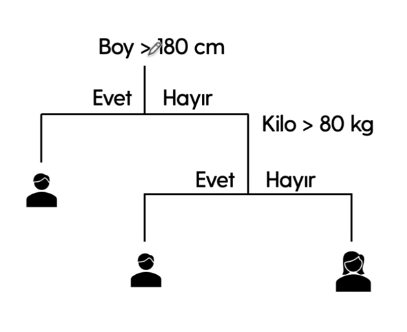

### Model ve Tahmin 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score,roc_auc_score, roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
df = pd.read_csv("diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [4]:
cart_model = DecisionTreeClassifier().fit(X_train, y_train)

In [5]:
cart_model

DecisionTreeClassifier()

In [6]:
y_pred = cart_model.predict(X_test)

In [7]:
accuracy_score(y_test, y_pred)

0.7229437229437229

### Model Tuning 

In [8]:
cart = DecisionTreeClassifier()

In [16]:
cart_params = {"max_depth" : [1,3,5,8,10],
              "min_samples_split" : [2,3,5,10,20,50]}

In [17]:
cart_cv_model = GridSearchCV(cart, cart_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [18]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [19]:
# final modeli
cart_tuned = DecisionTreeClassifier(max_depth =5, min_samples_split=20).fit(X_train, y_train)

In [20]:
y_pred = cart_tuned.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.7532467532467533